In [3]:
import numpy as np
import pandas as pd

In [4]:
players = pd.read_excel("Player_dataset.xlsx")

In [5]:
players

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,100500000.0,550000.0,27,...,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,79000000.0,375000.0,29,...,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,"RM, LM, RW",90,90,54500000.0,275000.0,30,...,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/nl.png
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,52500000.0,275000.0,32,...,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1363/60.png,https://cdn.sofifa.net/flags/se.png
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90,90,63500000.0,300000.0,28,...,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16150,220806,https://sofifa.com/player/220806/ellis-redman/...,E. Redman,Ellis Redman,CB,41,61,20000.0,2000.0,17,...,41,41,41,40,10,https://cdn.sofifa.net/players/220/806/15_120.png,https://cdn.sofifa.net/teams/112254/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-wls.png
16151,225509,https://sofifa.com/player/225509/aaron-collins...,A. Collins,Aaron Graham John Collins,ST,41,50,30000.0,2000.0,17,...,31,31,31,32,14,https://cdn.sofifa.net/players/225/509/15_120.png,https://cdn.sofifa.net/teams/112254/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-wls.png
16152,201197,https://sofifa.com/player/201197/paul-tisdale/...,P. Tisdale,Paul Tisdale,"CM, CAM",40,40,NaN,2000.0,41,...,33,33,33,34,10,https://cdn.sofifa.net/players/201/197/15_120.png,https://cdn.sofifa.net/teams/143/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/mt.png
16153,217591,https://sofifa.com/player/217591/piotr-zemlo/1...,P. Żemło,Piotr Żemło,"LM, LB",40,50,15000.0,2000.0,18,...,53-3,53-3,53-3,51-1,12,https://cdn.sofifa.net/players/217/591/15_120.png,https://cdn.sofifa.net/teams/1873/60.png,https://cdn.sofifa.net/flags/pl.png,NaN,https://cdn.sofifa.net/flags/pl.png


In [6]:
features =["overall","potential","wage_eur","value_eur","age"]

In [7]:
players = players.dropna(subset=features)

In [8]:
data = players[features].copy()

In [9]:
data

,overall,potential,wage_eur,value_eur,age
0,93,95,550000.0,100500000.0,27
1,92,92,375000.0,79000000.0,29
2,90,90,275000.0,54500000.0,30
3,90,90,275000.0,52500000.0,32
4,90,90,300000.0,63500000.0,28
...,...,...,...,...,...
16149,42,54,2000.0,25000.0,18
16150,41,61,2000.0,20000.0,17
16151,41,50,2000.0,30000.0,17
16153,40,50,2000.0,15000.0,18


In [10]:
data = ((data-data.min()) / (data.max()-data.min())) * 9 + 1

In [11]:
data.describe().all

<bound method NDFrame._add_numeric_operations.<locals>.all of             overall     potential      wage_eur     value_eur           age
count  15844.000000  15844.000000  15844.000000  15844.000000  15844.000000
mean       5.039953      5.389527      1.185276      1.096781      3.789778
std        1.219956      1.140029      0.388408      0.254573      1.463962
min        1.000000      1.000000      1.000000      1.000000      1.000000
25%        4.226415      4.634615      1.000000      1.011552      2.607143
50%        5.075472      5.326923      1.049270      1.031254      3.571429
75%        5.754717      6.192308      1.131387      1.073792      4.857143
max       10.000000     10.000000     10.000000     10.000000     10.000000>

In [12]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,10.000000,10.000000,10.000000,4.535714
1,9.830189,9.480769,7.125912,8.074608,5.178571
2,9.490566,9.134615,5.483577,5.880556,5.500000
3,9.490566,9.134615,5.483577,5.701450,6.142857
4,9.490566,9.134615,5.894161,6.686534,4.857143


In [13]:
def random_centroid(data,k):
    centroids=[]
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)    

In [14]:
centroids= random_centroid(data , 5)

In [15]:

centroids

,0,1,2,3,4
overall,5.754717,6.264151,2.698113,6.773585,5.924528
potential,4.634615,7.403846,7.923077,6.365385,6.538462
wage_eur,1.000000,1.000000,1.952555,1.000000,1.065693
value_eur,1.073792,1.020508,1.033493,1.058120,1.011552
age,2.928571,3.892857,6.142857,3.250000,4.857143


In [16]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [17]:
labels = get_labels(data, centroids)

In [18]:

labels.value_counts()

0    8304
4    4650
3    1707
1    1177
2       6
dtype: int64

In [19]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [21]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

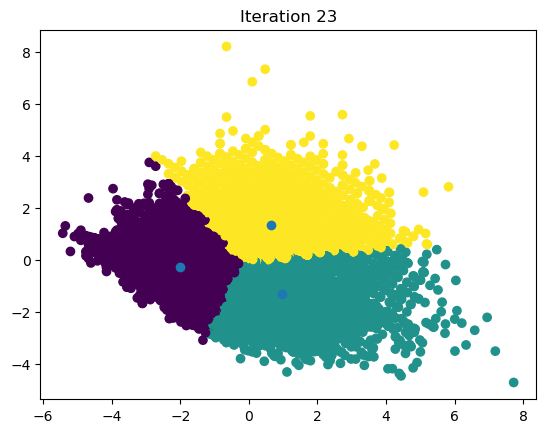

In [22]:
max_iterations = 100
centroid_count = 3

centroids = random_centroid(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [23]:
centroids

,0,1,2
overall,3.766161,6.059794,5.147078
potential,4.663138,6.560930,4.848008
wage_eur,1.008439,1.374023,1.102113
value_eur,1.010982,1.200822,1.050634
age,2.406094,3.359661,5.176583


In [24]:
labels.value_counts()

2    5563
0    5279
1    5002
dtype: int64

In [25]:

players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
7004,A. Al Hafith,65,68,8000.0,375000.0,21
7142,P. Díaz,65,68,4000.0,300000.0,19
7241,A. Al Sulaiheem,65,68,7000.0,425000.0,20
7259,G. Zajkov,65,70,4000.0,325000.0,19
7613,S. Dewaest,64,65,5000.0,425000.0,23
...,...,...,...,...,...,...
16149,M. Maier,42,54,2000.0,25000.0,18
16150,E. Redman,41,61,2000.0,20000.0,17
16151,A. Collins,41,50,2000.0,30000.0,17
16153,P. Żemło,40,50,2000.0,15000.0,18


In [26]:
from sklearn.cluster import KMeans

In [28]:
kmeans = KMeans(3)
kmeans.fit(data)

c:\Users\SHAHURAJ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [29]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,5.154901,4.054462,6.412581
potential,4.846406,4.943849,6.726067
wage_eur,1.091937,1.014701,1.559056
value_eur,1.045676,1.015247,1.283249
age,5.302329,2.586380,3.815475
